IRIS

In [30]:
from tensorflow.keras import Sequential
import pandas as pd
import numpy as np
import math
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import tensorflow
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects
from sklearn.datasets import load_iris

iris=load_iris()
x=iris.data
y=iris.target
data=pd.DataFrame(x)

scl=StandardScaler()
data[0]=scl.fit_transform(data[[0]])
data[1]=scl.fit_transform(data[[1]])
data[2]=scl.fit_transform(data[[2]])
data[3]=scl.fit_transform(data[[3]])

data

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


CUSTOM ACTIVATION FUNCTION =>K0+K1X

In [31]:
def custom_activation(x):
    for i in range(len(data)):
        if len(data)*(2/3)<=math.e**i:
            k0=math.e
            k1=(k0**(i-1)*2)
            break
    return (k1*x)+k0

get_custom_objects().update({'custom_activation': Activation(custom_activation)})

model = Sequential()

model.add(Dense(1000, input_dim=4))
model.add(Dense(1000,activation='custom_activation'))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 1000)              5000      
_________________________________________________________________
dense_20 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_21 (Dense)             (None, 3)                 3003      
Total params: 1,009,003
Trainable params: 1,009,003
Non-trainable params: 0
_________________________________________________________________


In [32]:
from sklearn.model_selection import train_test_split 
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.25,random_state=1)

In [33]:
import pandas as pd
model.compile(optimizer=Adam(),loss=SparseCategoricalCrossentropy(),metrics=["accuracy"])
t_history=model.fit(xtrain,ytrain,batch_size=300,epochs=30,validation_data=(xtest,ytest))

Epoch 1/30
1/1 [==============================] - 1s 1s/step - loss: 5.3725 - accuracy: 0.4196 - val_loss: 36.8153 - val_accuracy: 0.5263
Epoch 2/30
1/1 [==============================] - 0s 110ms/step - loss: 34.3201 - accuracy: 0.6161 - val_loss: 32.7435 - val_accuracy: 0.6316
Epoch 3/30
1/1 [==============================] - 0s 104ms/step - loss: 23.5862 - accuracy: 0.7679 - val_loss: 24.0372 - val_accuracy: 0.7368
Epoch 4/30
1/1 [==============================] - 0s 118ms/step - loss: 13.4441 - accuracy: 0.8036 - val_loss: 15.7691 - val_accuracy: 0.8158
Epoch 5/30
1/1 [==============================] - 0s 110ms/step - loss: 7.2425 - accuracy: 0.8929 - val_loss: 10.2773 - val_accuracy: 0.8421
Epoch 6/30
1/1 [==============================] - 0s 107ms/step - loss: 11.1145 - accuracy: 0.8661 - val_loss: 9.9959 - val_accuracy: 0.8421
Epoch 7/30
1/1 [==============================] - 0s 104ms/step - loss: 15.0458 - accuracy: 0.8482 - val_loss: 9.3891 - val_accuracy: 0.8684
Epoch 8/30
1/

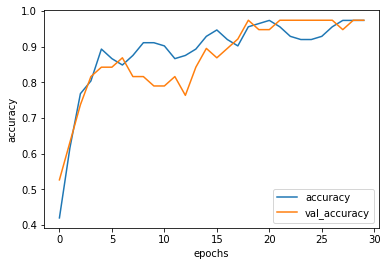

In [34]:
from matplotlib import pyplot as plt
h_data=t_history.history
plt.plot(h_data['accuracy'],label='accuracy')
plt.plot(h_data['val_accuracy'],label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

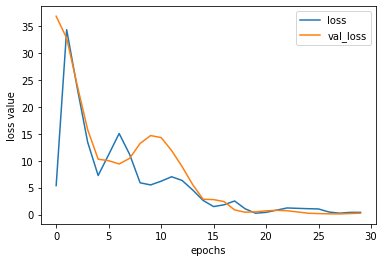

In [35]:
from matplotlib import pyplot as plt
plt.plot(h_data['loss'],label='loss')
plt.plot(h_data['val_loss'],label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss value')
plt.legend()

MNIST 

In [71]:
import tensorflow
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.datasets import fashion_mnist
data=fashion_mnist.load_data()

((xtrain,ytrain),(xtest,ytest))=data

for i in range(1,255,10):
    def custom_activation(x):
        k1=1/i
        k0=0
        return (k1*x)+k0

    get_custom_objects().update({'custom_activation': Activation(custom_activation)})
    print(i)

    model=Sequential()
    model.add(Flatten(input_shape=(28,28,)))
    model.add(Dense(1000,activation='custom_activation'))
    model.add(Dense(10,activation='softmax'))
    model.compile(optimizer=Adam(),loss=SparseCategoricalCrossentropy(),metrics=["accuracy"])
    t_history=model.fit(xtrain,ytrain,batch_size=100,epochs=1,validation_data=(xtest,ytest))

1
600/600 [==============================] - 13s 22ms/step - loss: 100.4618 - accuracy: 0.7083 - val_loss: 24.6783 - val_accuracy: 0.7580
11
600/600 [==============================] - 15s 25ms/step - loss: 8.1959 - accuracy: 0.7016 - val_loss: 2.8207 - val_accuracy: 0.7537
21
600/600 [==============================] - 16s 25ms/step - loss: 4.7455 - accuracy: 0.7123 - val_loss: 1.2812 - val_accuracy: 0.7649
31
600/600 [==============================] - 15s 25ms/step - loss: 3.7554 - accuracy: 0.7074 - val_loss: 0.9153 - val_accuracy: 0.7859
41
600/600 [==============================] - 16s 26ms/step - loss: 2.4594 - accuracy: 0.7252 - val_loss: 0.7783 - val_accuracy: 0.7944
51
600/600 [==============================] - 17s 27ms/step - loss: 2.2108 - accuracy: 0.7152 - val_loss: 0.6333 - val_accuracy: 0.8183
61
600/600 [==============================] - 16s 26ms/step - loss: 1.6202 - accuracy: 0.7295 - val_loss: 0.6761 - val_accuracy: 0.7967
71
600/600 [==============================] - 

In [75]:
for i in range(200,251,2):
    def custom_activation(x):
        k1=1/i
        k0=0
        return (k1*x)+k0

    get_custom_objects().update({'custom_activation': Activation(custom_activation)})
    print(i)

    model=Sequential()
    model.add(Flatten(input_shape=(28,28,)))
    model.add(Dense(1000,activation='custom_activation'))
    model.add(Dense(10,activation='softmax'))
    model.compile(optimizer=Adam(),loss=SparseCategoricalCrossentropy(),metrics=["accuracy"])
    t_history=model.fit(xtrain,ytrain,batch_size=100,epochs=1,validation_data=(xtest,ytest))

200
600/600 [==============================] - 14s 22ms/step - loss: 0.7515 - accuracy: 0.7584 - val_loss: 0.5446 - val_accuracy: 0.8173
202
600/600 [==============================] - 15s 24ms/step - loss: 0.7705 - accuracy: 0.7552 - val_loss: 0.5396 - val_accuracy: 0.8100
204
600/600 [==============================] - 15s 25ms/step - loss: 0.7891 - accuracy: 0.7530 - val_loss: 0.5476 - val_accuracy: 0.8149
206
600/600 [==============================] - 16s 25ms/step - loss: 0.7610 - accuracy: 0.7538 - val_loss: 0.5327 - val_accuracy: 0.8144
208
600/600 [==============================] - 16s 26ms/step - loss: 0.7968 - accuracy: 0.7587 - val_loss: 0.5055 - val_accuracy: 0.8241
210
600/600 [==============================] - 16s 26ms/step - loss: 0.7496 - accuracy: 0.7583 - val_loss: 0.5852 - val_accuracy: 0.7884
212
600/600 [==============================] - 16s 26ms/step - loss: 0.7742 - accuracy: 0.7511 - val_loss: 0.4909 - val_accuracy: 0.8324
214
600/600 [============================

In [82]:
import tensorflow
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.datasets import fashion_mnist
data=fashion_mnist.load_data()

((xtrain,ytrain),(xtest,ytest))=data


def custom_activation(x):
    k1=1/222
    k0=0
    return (k1*x)+k0

get_custom_objects().update({'custom_activation': Activation(custom_activation)})
model=Sequential()
model.add(Flatten(input_shape=(28,28,)))
model.add(Dense(1000,activation='custom_activation'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer=Adam(),loss=SparseCategoricalCrossentropy(),metrics=["accuracy"])
t_history=model.fit(xtrain,ytrain,batch_size=100,epochs=10,validation_data=(xtest,ytest))

Epoch 1/10
600/600 [==============================] - 13s 21ms/step - loss: 0.7318 - accuracy: 0.7574 - val_loss: 0.5264 - val_accuracy: 0.8186
Epoch 2/10
600/600 [==============================] - 14s 23ms/step - loss: 0.4833 - accuracy: 0.8314 - val_loss: 0.4973 - val_accuracy: 0.8268
Epoch 3/10
600/600 [==============================] - 15s 25ms/step - loss: 0.4584 - accuracy: 0.8390 - val_loss: 0.5303 - val_accuracy: 0.8198
Epoch 4/10
600/600 [==============================] - 15s 25ms/step - loss: 0.4509 - accuracy: 0.8440 - val_loss: 0.5271 - val_accuracy: 0.8178
Epoch 5/10
600/600 [==============================] - 15s 26ms/step - loss: 0.4323 - accuracy: 0.8478 - val_loss: 0.4633 - val_accuracy: 0.8394
Epoch 6/10
600/600 [==============================] - 15s 25ms/step - loss: 0.4338 - accuracy: 0.8500 - val_loss: 0.5253 - val_accuracy: 0.8102
Epoch 7/10
600/600 [==============================] - 15s 26ms/step - loss: 0.4294 - accuracy: 0.8510 - val_loss: 0.4941 - val_accuracy:

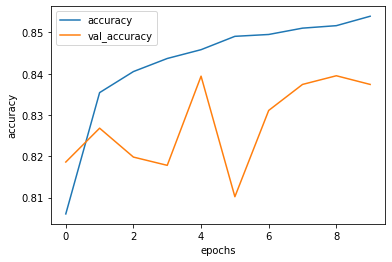

In [83]:
from matplotlib import pyplot as plt
h_data=t_history.history
plt.plot(h_data['accuracy'],label='accuracy')
plt.plot(h_data['val_accuracy'],label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

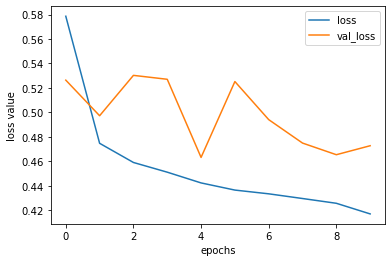

In [84]:
from matplotlib import pyplot as plt
plt.plot(h_data['loss'],label='loss')
plt.plot(h_data['val_loss'],label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss value')
plt.legend()

NameError: name 'data' is not defined